In [39]:
import pandas as pd

# Import dataset
dataset = pd.read_csv('Advertising.csv')
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


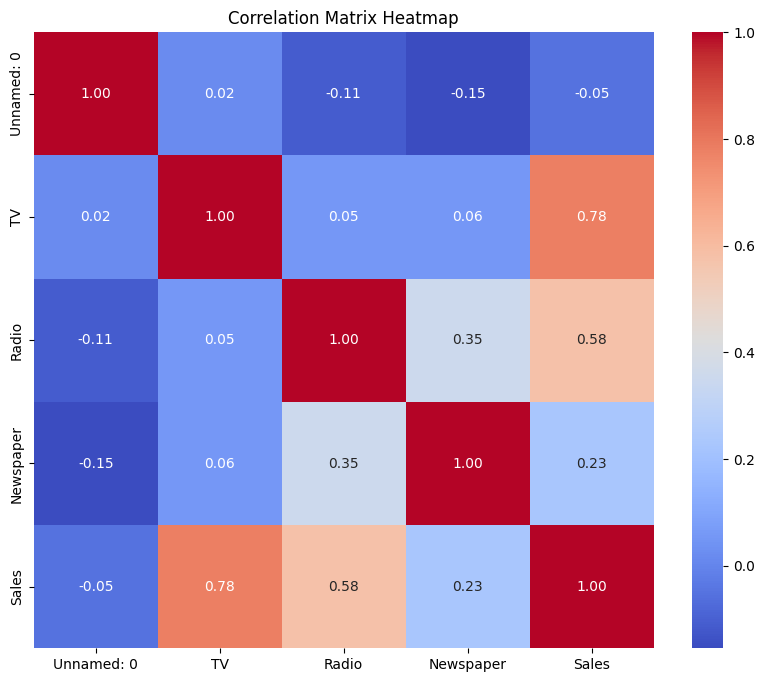

In [41]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Exclude non-numeric column dari ecorrelation matrix
numeric_cols = dataset.select_dtypes(include=[np.number]).columns
correlation_matrix = dataset[numeric_cols].corr()

# Plot heatmap untu matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [42]:

# Split data menjadi features (X) dan target variable (y)
X = dataset.iloc[:, [1,2,3]].values
y = dataset.iloc[:, 4].values

In [43]:
# Membagi data ke test dan training set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize ANN
regression_model = Sequential()

# Add input layer and hidden layers
regression_model.add(Dense(units=10, kernel_initializer='uniform', activation='relu'))
regression_model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))

# Add output layer
regression_model.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))

# Compile the model for regression
regression_model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model to training data
regression_model.fit(X_train, y_train, batch_size=8, epochs=150)

# Predict on test data
y_pred = regression_model.predict(X_test)

Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 225.1333
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 244.6851 
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 225.4664 
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 224.1013 
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 233.2329 
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 228.7707
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 204.4999 
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 191.2459 
Epoch 9/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 197.2579 
Epoch 10/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 166.5531 
Epoch 11/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 159.5815
Epoch 12/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 132.4398 
Epoch 13/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 108.6781
Epoch 14/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 84.7672
Epoch 15/150
20/20 ━━━━━━━━━━━━━━━━

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate RMSE
rmse_modified = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae_modified = mean_absolute_error(y_test, y_pred)

# Calculate R^2
r_squared = r2_score(y_test, y_pred)

# Print modified metrics
print("Root Mean Square Error (RMSE):", rmse_modified)
print("Mean Absolute Error (MAE):", mae_modified)
print("R-squared (R^2):", r_squared)

Root Mean Square Error (RMSE): 1.7911436158306753
Mean Absolute Error (MAE): 1.087879800796509
R-squared (R^2): 0.8980536332952823


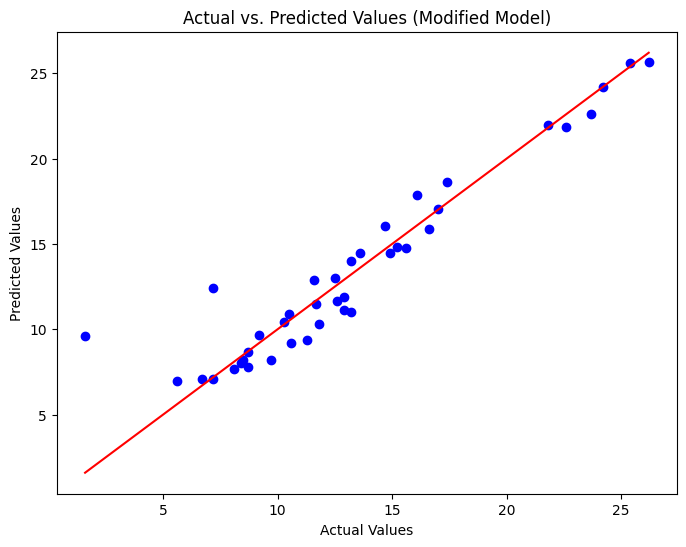

In [47]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') 
plt.title('Actual vs. Predicted Values (Modified Model)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
